## Lesson 16 - KNN Regression

In [71]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split

## Introduction to KNN Regression

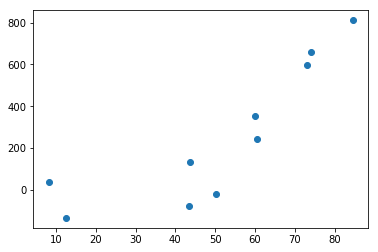

In [72]:
#sd = np.random.choice(range(9999))
np.random.seed(3383)
#print(sd)

n = 10

x = np.random.uniform(0,100,n)
y = 0.002 * x**3 - 2.7*x + np.random.normal(0,100,n)

X = x.reshape(n,1)

plt.close()
plt.scatter(x,y)
plt.show()

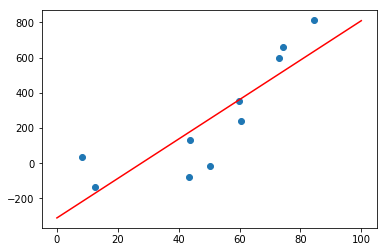

In [73]:
lin_mod = LinearRegression()
lin_mod.fit(X,y)

ticks = np.linspace(0,100,100)
#ticks = np.arange(0,100,0.1)
y_pred = lin_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(x,y)
plt.plot(ticks, y_pred, c='r')
plt.show()

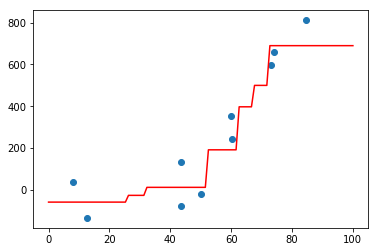

In [75]:
knn_mod = KNeighborsRegressor(3)
knn_mod.fit(X,y)

ticks = np.linspace(0,100,100)
#ticks = np.arange(0,100,0.1)
y_pred = knn_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(x,y)
plt.plot(ticks, y_pred, c='r')
plt.show()

## Comparison of Algorithms on Larger Dataset

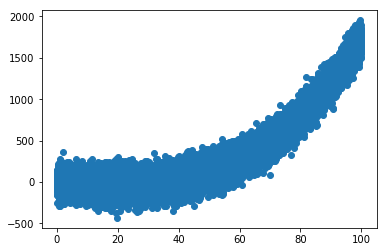

In [76]:
#sd = np.random.choice(range(9999))
np.random.seed(3383)
#print(sd)

n = 20000

x = np.random.uniform(0,100,n)
y = 0.002 * x**3 - 2.7*x + np.random.normal(0,100,n)

X = x.reshape(n,1)

plt.close()
plt.scatter(x,y)
plt.show()

### Create Training, Testing, and Validation Sets

In [77]:
X_train, X_holdout, y_train, y_holdout = train_test_split(X, y, test_size=0.2, random_state=1)
X_test, X_val, y_test, y_val = train_test_split(X_holdout, y_holdout, test_size=0.5, random_state=1)

print(y_train.shape)
print(y_val.shape)
print(y_test.shape)

(16000,)
(2000,)
(2000,)


### Linear Regression Model

Training r2: 0.755253977456
Testing r2:  0.764037477068


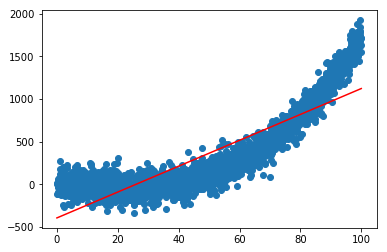

In [78]:
lin_mod = LinearRegression()
lin_mod.fit(X_train, y_train)

print("Training r2:", lin_mod.score(X_train, y_train))
print("Testing r2: ", lin_mod.score(X_test, y_test))

ticks = np.linspace(0,100,100)
y_pred = lin_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(X_test, y_test)
plt.plot(ticks, y_pred, c='r')
plt.show()

### KNN Regression Model

#### Using the Validation Set to Select K

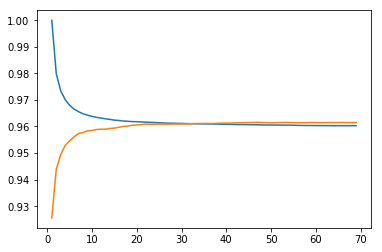

In [89]:
train_r2 = []
val_r2 = []

rng = np.arange(1,70,1)

for K in rng:
    temp_mod = KNeighborsRegressor(K)
    temp_mod.fit(X_train, y_train)
    train_r2.append( temp_mod.score(X_train, y_train) )
    val_r2.append( temp_mod.score(X_val, y_val) )
    
plt.close()
plt.plot(rng, train_r2)
plt.plot(rng, val_r2)
plt.show()
    

Training r2: 0.960558189071
Testing r2:  0.958075529878


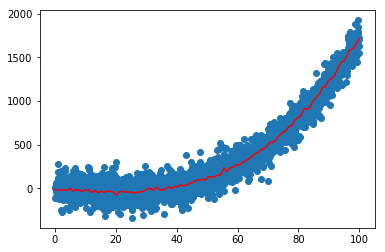

In [90]:
knn_mod = KNeighborsRegressor(50)
knn_mod.fit(X_train, y_train)

print("Training r2:", knn_mod.score(X_train, y_train))
print("Testing r2: ", knn_mod.score(X_test, y_test))

ticks = np.linspace(0,100,100)
y_pred = knn_mod.predict(ticks.reshape(100,1))

plt.close()
plt.scatter(X_test, y_test)
plt.plot(ticks, y_pred, c='r')
plt.show()

## Polynomial Regression

#### Add New Polynomial Features

In [101]:
x1 = x.reshape(n,1)
x2 = (x**2).reshape(n,1)
x3 = (x**3).reshape(n,1)

Xpoly = np.concatenate([x1, x2, x3], axis=1)

Xpoly_train, Xpoly_holdout, y_train, y_holdout = train_test_split(Xpoly, y, test_size = 0.2, random_state=1)
Xpoly_val, Xpoly_test, y_val, y_test = train_test_split(Xpoly_holdout, y_holdout, test_size = 0.5, random_state=1)

#### Polynomial Model Using all Four Features

In [102]:
poly_mod = LinearRegression()
poly_mod.fit(Xpoly_train, y_train)

print('Coefficients:', poly_mod.coef_)
print('Training r2: ', poly_mod.score(Xpoly_train, y_train))
print('Testing r2:  ', poly_mod.score(Xpoly_test, y_test))


Coefficients: [ -2.24454596e+00  -1.16479093e-02   2.08106682e-03]
Training r2:  0.959689783281
Testing r2:   0.962376127153


## Lasso Regression with Polynomial Features

#### Use Validation Set to Select Alpha

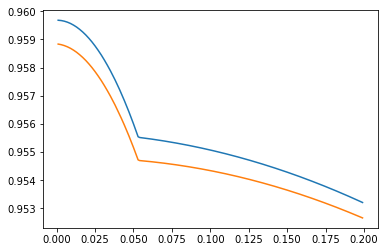

In [103]:
train_r2 = []
val_r2 = []

rng = np.arange(0.001, 0.2, 0.001)

for a in rng:
    temp_mod = Lasso(a, normalize=True)
    temp_mod.fit(Xpoly_train, y_train)
    train_r2.append(temp_mod.score(Xpoly_train, y_train))
    val_r2.append(temp_mod.score(Xpoly_val, y_val))
    
plt.close()
plt.plot(rng, train_r2)
plt.plot(rng, val_r2)
plt.show()

#### Lasso Model with alpha = 0.001

In [104]:
lasso_mod = Lasso(0.001, normalize=True)
lasso_mod.fit(Xpoly_train, y_train)
print(lasso_mod.coef_)

[ -2.68631284e+00  -0.00000000e+00   2.00107540e-03]


## Polynomial Model using only x and x^3

In [105]:
poly_mod = LinearRegression()
poly_mod.fit(Xpoly_train[:,[0,2]], y_train)

print('Coefficients:', poly_mod.coef_)
print('Training r2: ', poly_mod.score(Xpoly_train[:,[0,2]], y_train))
print('Testing r2: ', poly_mod.score(Xpoly_test[:,[0,2]], y_test))

Coefficients: [ -2.72800165e+00   2.00543763e-03]
Training r2:  0.959681504637
Testing r2:  0.962362822291
